In [1]:
import torch
from overfit.utils.misc import sharpen
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
import math
import numpy as np


In [2]:
constant = torch.Tensor([0.25, 0.25, 0.25, 0.25]).type(torch.float64)
almost_constant = torch.Tensor([0.24, 0.25, 0.26, 0.25]).type(torch.float64)
random = torch.nn.functional.softmax(torch.rand(4), dim=0).type(torch.float64)


In [3]:
## Initialize #{{{
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern Roman, Times"]})
colors = (
    "#BB3300",
    "#8800DD",
    "#2200FF",
    "#0099DD",
    "#00AA00",
    "#AA8800",
    "#661100",
    "#440077",
    "#000088",
    "#003366",
    "#004400",
    "#554400",
)
# }}}


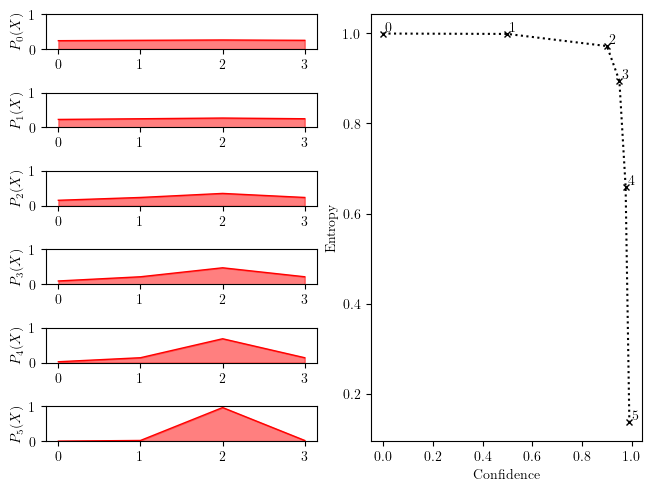

In [4]:
X = almost_constant
entropies = []
confidences = [0, 0.5, 0.9, 0.95, 0.975, 0.99]
n = len(confidences)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(n, 2, figure=fig)
left_axis = [fig.add_subplot(gs[i, 0]) for i in range(n)]
right_axis = fig.add_subplot(gs[:, 1])
for ix, conf in enumerate(confidences):
    x = sharpen(X, T=1 - conf, dim=0)
    left_axis[ix].plot(x, color="r", linewidth=1)
    left_axis[ix].fill_between(list(range(len(x))), x.numpy(), color="r", alpha=0.5)
    left_axis[ix].set_ylim(0, 1)
    left_axis[ix].set_ylabel(f"$P_{ix}(X)$")
    h = torch.distributions.Categorical(probs=x).entropy() / math.log(len(x))
    entropies.append(h)

right_axis.plot(
    confidences, entropies, color="black", linestyle="dotted", marker="x", markersize=5
)
right_axis.set_xlabel("Confidence")
right_axis.set_ylabel("Entropy")
for i in range(n):
    right_axis.annotate(
        str(i),
        (confidences[i], entropies[i]),
        (confidences[i] + 0.01, entropies[i] + 0.005),
    )
plt.savefig("entropy.png", dpi=300)


In [5]:
p = torch.Tensor([0.25, 0.25, 0.25, 0.25])
h = torch.distributions.Categorical(probs=p).entropy()
h


tensor(1.3863)

In [6]:
p = torch.Tensor([0.10, 0.10, 0.70, 0.10])
h = torch.distributions.Categorical(probs=p).entropy()
h


tensor(0.9404)

In [14]:
x = almost_constant.type(torch.float64)
print(sharpen(x, 0.01, dim=0))



tensor([3.2121e-04, 1.9040e-02, 9.6160e-01, 1.9040e-02], dtype=torch.float64)
50.0
tensor([0.2400, 0.2500, 0.2600, 0.2500], dtype=torch.float64)
tensor([1.0246e-31, 7.8886e-31, 5.6062e-30, 7.8886e-31], dtype=torch.float64)
